In [1]:
%matplotlib inline
from collections import OrderedDict

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle

import numpy as np
import xarray as xr

from geopack import geopack, t89, t96

Load IGRF coefficients ...


In [2]:
def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(-10,40),ylim=(-10,10),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):
    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax
# ax = setup_fig(xlim=(-10,10),ylim=(-10,10))

# Github Example

In [3]:
ut                   = 100
xgsm,ygsm,zgsm       = [1,2,3]
ps                   = geopack.recalc(ut)
b0xgsm,b0ygsm,b0zgsm = geopack.dip(xgsm,ygsm,zgsm)    		# calc dipole B in GSM.
dbxgsm,dbygsm,dbzgsm = t89.t89(2, ps, xgsm,ygsm,zgsm)       # calc T89 dB in GSM.
bxgsm,bygsm,bzgsm    = [b0xgsm+dbxgsm,b0ygsm+dbygsm,b0zgsm+dbzgsm]
print(bxgsm,bygsm,bzgsm)
#-539.5083883330017 -569.5906371610358 -338.8680547453352

-539.5083883330018 -569.5906371610357 -338.86805474533514


# Dipole Field

In [4]:
xlim, dx = (-10,30), 0.1
zlim, dz = (-10,10), 0.1
x_vec    = np.arange(*xlim,dx)
y_vec    = np.array([0.])
z_vec    = np.arange(*zlim,dz)

xx,yy,zz = np.meshgrid(x_vec,y_vec,z_vec,indexing='ij')

In [5]:
b0xgsm,b0ygsm,b0zgsm = geopack.dip(xx,yy,zz)    		# calc dipole B in GSM.

In [6]:
dims   = ['X GSM', 'Y GSM', 'Z GSM']
coords = x_vec, y_vec, z_vec
bx_dip = xr.DataArray(b0xgsm,coords,dims,name='Bx GSM')
by_dip = xr.DataArray(b0ygsm,coords,dims,name='By GSM')
bz_dip = xr.DataArray(b0zgsm,coords,dims,name='Bz GSM')

bT_dip = np.sqrt(bx_dip**2 + by_dip**2 + bz_dip**2)
bT_dip.name ='|B| GSM'

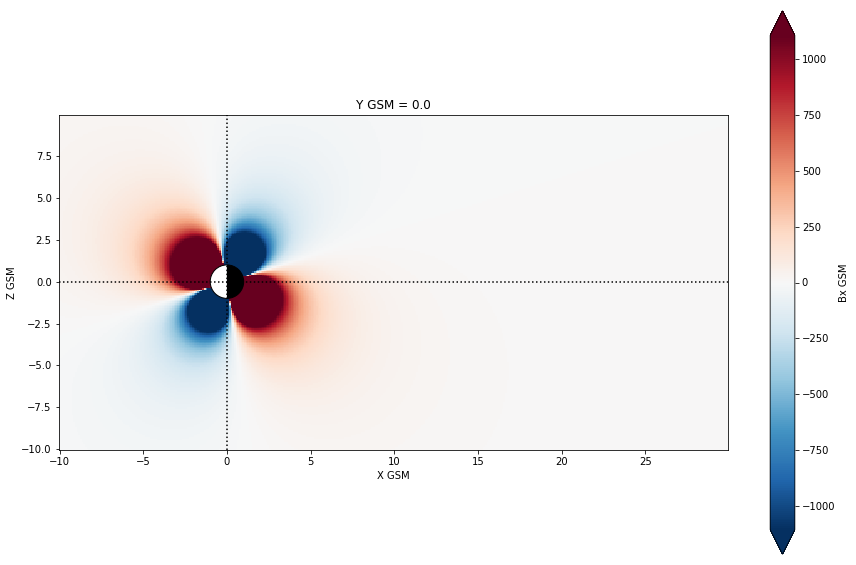

In [7]:
ax   = setup_fig(xlim=xlim,ylim=zlim)
data = bx_dip.loc[:,0,:]
data.plot.pcolormesh('X GSM','Z GSM',ax=ax,robust=True)
plt.show()

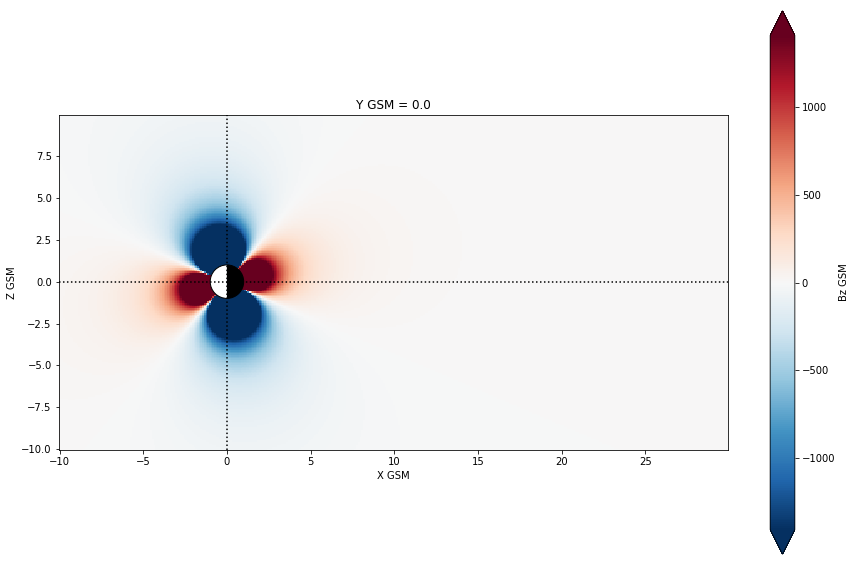

In [8]:
ax   = setup_fig(xlim=xlim,ylim=zlim)
data = bz_dip.loc[:,0,:]
data.plot.pcolormesh('X GSM','Z GSM',ax=ax,robust=True)
plt.show()

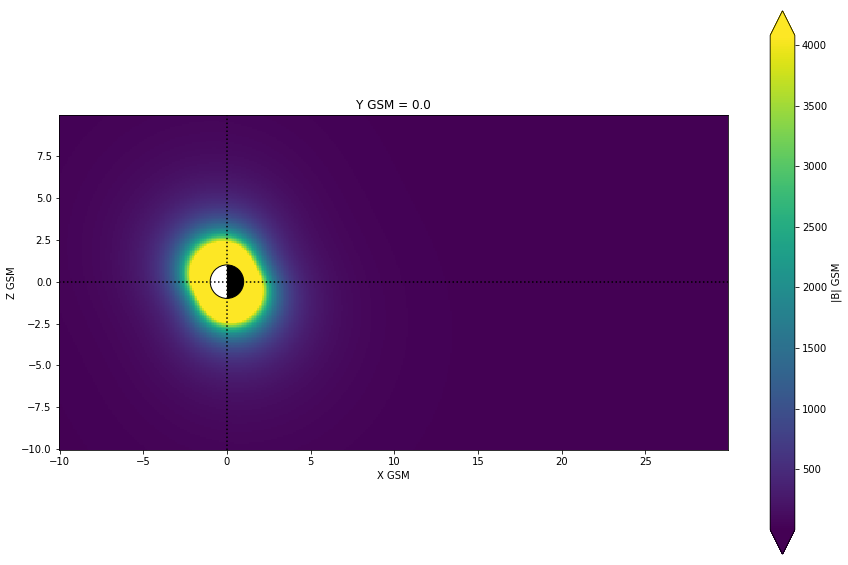

In [9]:
ax   = setup_fig(xlim=xlim,ylim=zlim)
data = bT_dip.loc[:,0,:]
data.plot.pcolormesh('X GSM','Z GSM',ax=ax,robust=True)
plt.show()

# T96

In [10]:
xlim, dx = (-10,30), 0.1
zlim, dz = (-10,10), 0.1
x_vec    = np.arange(*xlim,dx)
y_vec    = np.array([0.])
z_vec    = np.arange(*zlim,dz)

xx,yy,zz = np.meshgrid(x_vec,y_vec,z_vec,indexing='ij')

In [12]:
ut                   = 100 # UT in seconds
ps                   = geopack.recalc(ut)

In [26]:
shape = xx.shape

In [23]:
dbx,dby,dbz = [],[],[]
for x,y,z in zip(xx.flat,yy.flat,zz.flat):
    db = t89.t89(2, ps, x,y,z)       # calc T89 dB in GSM.
    dbx.append(db[0])
    dby.append(db[1])
    dbz.append(db[2])

In [29]:
dbx = np.array(dbx)
dby = np.array(dby)
dbz = np.array(dbz)

dbx.shape = shape
dby.shape = shape
dbz.shape = shape

array([[[ -24.53249368,  -24.52614972,  -24.5198861 , ...,
           18.05044732,   18.1007502 ,   18.1531958 ]],

       [[ -24.55591926,  -24.54843965,  -24.54102967, ...,
           18.05064667,   18.10131162,   18.15413417]],

       [[ -24.57822066,  -24.56957062,  -24.56097887, ...,
           18.05010671,   18.10113658,   18.15433922]],

       ...,

       [[-135.4110052 , -134.89466518, -134.37467751, ...,
           36.25556756,   37.48308468,   38.71414248]],

       [[-136.09618446, -135.57730258, -135.05475483, ...,
           36.4332278 ,   37.6670537 ,   38.90444148]],

       [[-136.78462836, -136.26319167, -135.73807078, ...,
           36.61173704,   37.85189862,   39.09564327]]])

In [33]:
bx_tsyg = bx_dip + dbx
by_tsyg = by_dip + dby
bz_tsyg = bz_dip + dbz
bT_tsyg = np.sqrt(bx_tsyg**2 + by_tsyg**2 + bz_tsyg**2)

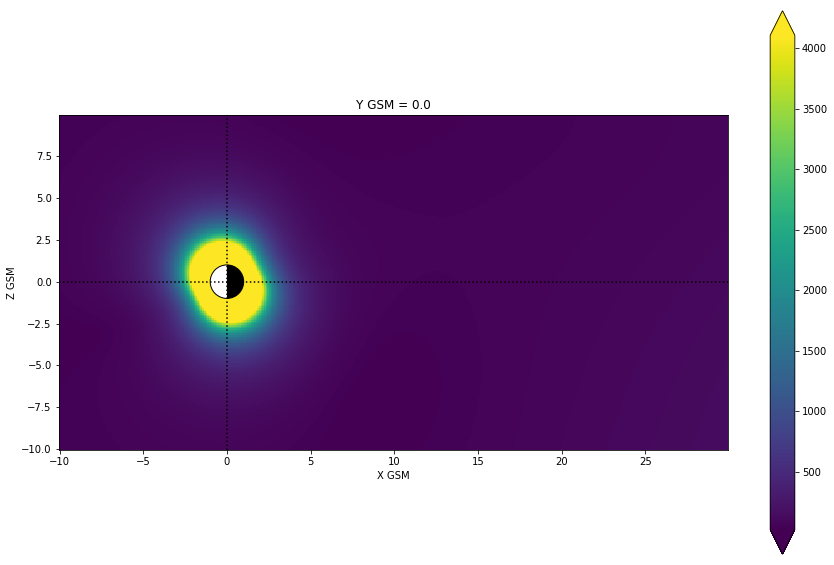

In [34]:
ax   = setup_fig(xlim=xlim,ylim=zlim)
data = bT_tsyg.loc[:,0,:]
data.plot.pcolormesh('X GSM','Z GSM',ax=ax,robust=True)
plt.show()

In [35]:
geopack.trace(1,0,0.5,1)

(0.9922706715362801, 0.0005429281031352112, 0.1240842068288764)